# Comparisons of different distributions for 6 different points : return level and histogram plots

In [54]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import utils
from scipy.signal import find_peaks, argrelextrema,argrelmax,argrelmin
import scipy.stats as stats
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cmaps

In [55]:
from xhistogram.xarray import histogram

In [56]:
from scipy.stats import genextreme as gev
def empirical_return_level(data):
    """
    Compute empirical return level using the algorithm introduced in Tutorial 2
    """
    df = pd.DataFrame(index=np.arange(data.size))
    # sort the data
    df["sorted"] = np.sort(data)[::-1]
    # rank via scipy instead to deal with duplicate values
    df["ranks_sp"] = np.sort(stats.rankdata(-data))
    # find exceedence probability
    n = data.size
    df["exceedance"] = df["ranks_sp"] / (n + 1)
    # find return period
    df["period"] = 1 / df["exceedance"]

    df = df[::-1]

    out = xr.DataArray(
        dims=["period"],
        coords={"period": df["period"]},
        data=df["sorted"],
        name="level",
    )
    return out

In [57]:
yearb=1980
yeare=2008

# Define mask
dsm=xr.open_dataset('/data/ghervieux/AFI/mask_usa_for_ERA5crop.nc')
mask=dsm['mask_usa'].load()
#

datadir='/data/ghervieux/AFI'
files=[f'{datadir}/AFI_ERA5_{iyear}_fullUSA.nc' for iyear in range(yearb,yeare+1)]

ds=xr.open_mfdataset(files)

return_periods=[2, 5, 10, 25, 50, 100]
return_afi=np.zeros((len(return_periods),len(ds.lat),len(ds.lon)))*np.nan
Rmethod=np.zeros((len(ds.lat),len(ds.lon)))*np.nan
Tlon=ds.lon.data
Tlat=ds.lat.data


idlat,idlon=np.where(mask==1)

In [58]:
units=ds['AFI'].units
ksN=20

In [59]:
dso=xr.open_dataset(f'{datadir}/afi_return.fullUSA.nc')

# Define list of 4 pts

In [60]:
ptlon=[260,270,264.25,241,205,204]
ptlat=[48,40,37,46.25,68.75,60]

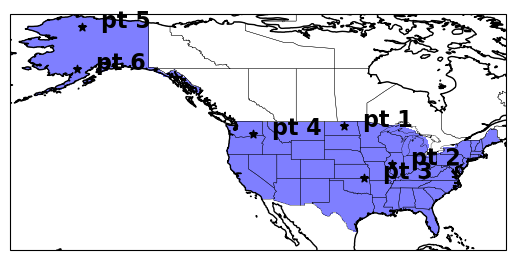

In [61]:
proj=ccrs.LambertConformal()
proj=ccrs.PlateCarree()
fig, ax = plt.subplots(nrows=1,ncols=1,subplot_kw={'projection':proj})
cc=mask.where(mask>0).plot.pcolormesh(ax=ax,cmap = cmaps.BlGrYeOrReVi200, levels=np.arange(1,3,1),alpha=0.5, add_colorbar=False)
for ip in range(0,6):
  ax.scatter(ptlon[ip],ptlat[ip],marker='*',color='k')
  ax.text(ptlon[ip]-360+4,ptlat[ip],f'pt {ip+1}',color='k',size=16,weight='bold')

state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='None')
ax.add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.25)
ax.set_extent([190,294,22,62])
ax.coastlines()

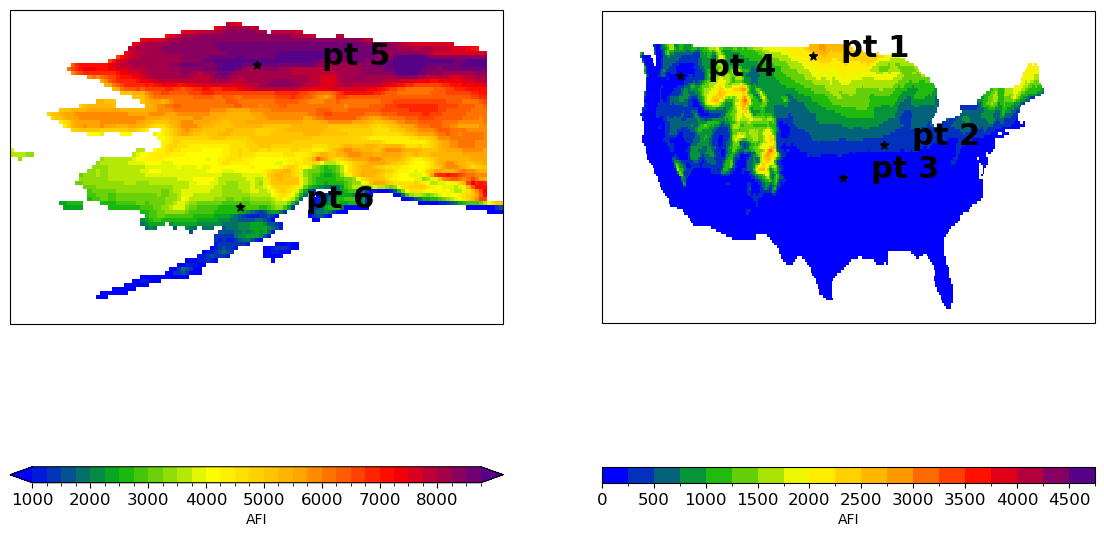

In [62]:
cmap=cmaps.BlGrYeOrReVi200

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,8),subplot_kw={'projection':proj})


cc=ds['AFI'].where(ds['AFI']>0.).mean('time').sel(lon=slice(190,220),lat=slice(72,53)).plot(ax=ax[0],cmap=cmap,levels=np.arange(1000,9000,250),add_colorbar=False)
for ip in range(4,6):
  ax[0].scatter(ptlon[ip],ptlat[ip],marker='*',color='k')
  ax[0].text(ptlon[ip]-360+4,ptlat[ip],f'pt {ip+1}',color='k',size=22,weight='bold')
p0 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.1, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,\
        shrink=0.5,\
        orientation='horizontal',label='AFI')
cbar.ax.tick_params(labelsize=12)   

cc=ds['AFI'].where(ds['AFI']>0.).mean('time').sel(lon=slice(230,300),lat=slice(52,22)).plot(ax=ax[1],cmap=cmap,levels=np.arange(0,5000,250),add_colorbar=False)
for ip in range(0,4):
  ax[1].scatter(ptlon[ip],ptlat[ip],marker='*',color='k')
  ax[1].text(ptlon[ip]-360+4,ptlat[ip],f'pt {ip+1}',color='k',size=22,weight='bold')
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0.1, p0[2]-p0[0], 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,\
        shrink=0.5,\
        orientation='horizontal',label='AFI')
cbar.ax.tick_params(labelsize=12)


asp = np.diff(ax[0].get_xlim())[0] / np.diff(ax[0].get_ylim())[0]
ax[1].set_aspect(asp)


# Pt 1 

In [63]:
ij=0
ilon=ptlon[ij]
ilat=ptlat[ij]
afi=ds['AFI'].sel(lon=ilon,lat=ilat).load()

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_3590456/1693931927.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/1693931927.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/1693931927.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
/tmp/ipykernel_3590456/1693931927.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fonts

Text(0.5, 1.0, 'AFI at (260$\\degree$E;48$\\degree$N)')

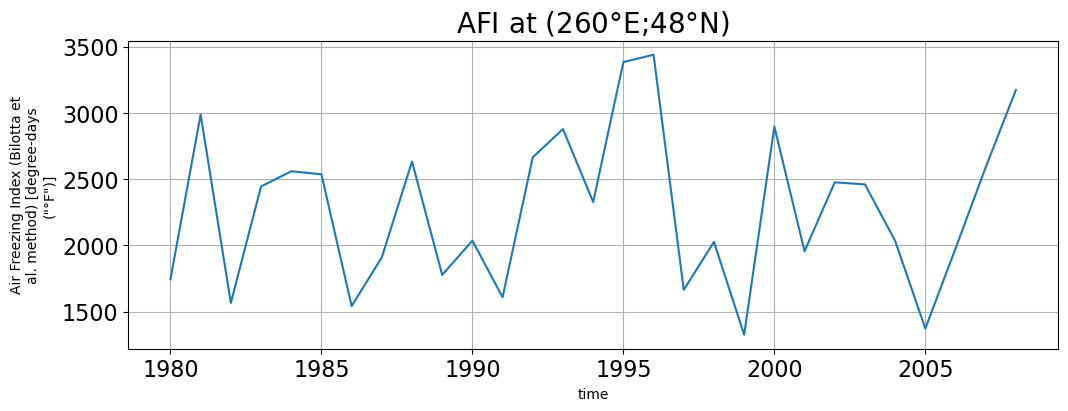

In [64]:
fig, axs =plt.subplots(nrows=1,ncols=1,figsize=(12,4))
afi.plot(ax=axs)
axs.grid()
axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fontsize=16)
axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)


# With GEV vs Gumbl vs Weibull

# Retun level Plot
A return level plot of the annual AFI in degree-days (F) versus the return period in years. The smaller the return period, the more data points we have, as these events are more likely. In contrast, events of a 10-year to a 100-year return period are rare in our 103-year-long dataset.

/tmp/ipykernel_3590456/1166793212.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/1166793212.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


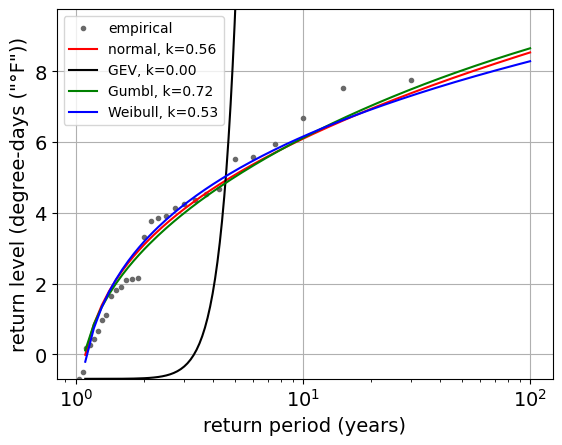

In [65]:
# Extract AFI values
afi_values = afi.values
# Remove zeros if any (as in Bilotta et al.)
nonzero_afis = afi_values[afi_values > 0]


# setup plots
fig, ax = plt.subplots()
# get empirical return levels and plot them
_ = empirical_return_level(nonzero_afis).plot(ax=ax, marker=".", color='dimgray',linestyle="None",label="empirical")
# create vector of years
years = np.arange(1.1, 100, 0.1)
# calculate and plot the normal return levels
pv_n=stats.kstest(nonzero_afis,stats.norm.cdf, args=(nonzero_afis.mean(),nonzero_afis.std()),N=ksN)[1]
ax.plot(years,stats.norm.ppf(1 - 1 / years, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),c='r',label=f"normal, k={pv_n:0.2f}")
# calculate and plot the GEV distribution, note the negtive shape parameter
shape, loc, scale = gev.fit(nonzero_afis)
pv_g= stats.kstest(nonzero_afis, 'genextreme', args=(shape, loc, scale),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shape, loc=loc, scale=scale),c='k',label=f"GEV, k={pv_g:0.2f}")

# calculate and plot the Gumbl distribution
shapeg, locg, scaleg = gev.fit(nonzero_afis,0)
pv_u = stats.kstest(nonzero_afis, 'genextreme', args=(shapeg, locg, scaleg),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shapeg, loc=locg, scale=scaleg),c='g',label=f"Gumbl, k={pv_u:0.2f}")

# Weibul distribution
params = stats.weibull_min.fit(nonzero_afis, floc=0) # floc=0 fixes the location parameter at 0
c_est, loc_est, scale_est = params
pv_w = stats.kstest(nonzero_afis, stats.weibull_min.name, params,N=ksN)[1]
ax.plot(years, stats.weibull_min(c_est, loc_est, scale_est).ppf(1 - 1 / years),c='b',label=f"Weibull, k={pv_w:0.2f}")

# set x axis to log scale
ax.set_xscale("log")
ax.set_ylabel(f'return level ({units})',fontsize=14)
ax.set_xlabel('return period (years)',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
ax.grid()
# set y axis lim
ax.set_ylim(nonzero_afis.min(),nonzero_afis.max()+500.)
# show legend
ax.legend()


# Histogram and distributions Plot:
Histogram plot of the annual AFI in degree-days (F) with normal, GEV, Gumbl, Weibull distributions overlaid in red, black, green and blue. 

/tmp/ipykernel_3590456/184545026.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/184545026.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


[Text(0, 0.0, '0.0000'),
 Text(0, 0.0005, '0.0005'),
 Text(0, 0.001, '0.0010'),
 Text(0, 0.0015, '0.0015'),
 Text(0, 0.002, '0.0020'),
 Text(0, 0.0025, '0.0025')]

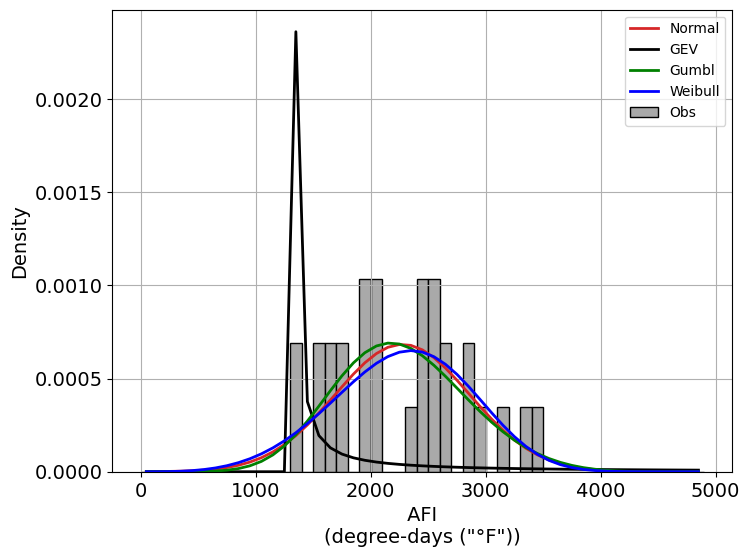

In [66]:
#####
##### PDF Plot
#####

bins = np.arange(0,5000,100)
x100 = (bins[1:]+bins[:-1])*0.5
# create vector of years
years = np.arange(1.1, 100, 0.1)

fig, ax= plt.subplots(nrows=1,ncols=1,figsize=(8,6))
dh=histogram(afi.where(afi>0), bins=bins,density=True, block_size=None)
ax.bar((bins[1:]+bins[:-1])*0.5,dh.data,edgecolor='k',color='darkgrey',\
          width=np.diff(bins), label='Obs')

# normal distribution
ax.plot(x100,stats.norm.pdf(x100, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),
    c="C3",lw=2,label="Normal")
# GEV distribution
ax.plot(x100, gev.pdf(x100, shape, loc=loc, scale=scale), c="k", lw=2, label="GEV")
# Gumbl distribution
ax.plot(x100, gev.pdf(x100, shapeg, loc=locg, scale=scaleg), c="g", lw=2, label="Gumbl")

# Weibul distribution
ax.plot(x100, stats.weibull_min(c_est, loc_est, scale_est).pdf(x100), c="b", lw=2, label="Weibull")

# calculate and plot the Gumbl distribution
shape, loc, scale = gev.fit(nonzero_afis,0)
ax.legend()
ax.grid()
ax.set_xlabel(f" AFI \n({units})",fontsize=14)
ax.set_ylabel("Density",fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)

# Pt 2 

In [67]:
ij=1
ilon=ptlon[ij]
ilat=ptlat[ij]
afi=ds['AFI'].sel(lon=ilon,lat=ilat).load()
result,method = utils.calculate_bilotta_afi_return_periods(afi,return_periods=return_periods, method='gev')

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
/tmp/ipykernel_3590456/2325202151.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fonts

Text(0.5, 1.0, 'AFI at (270$\\degree$E;40$\\degree$N)')

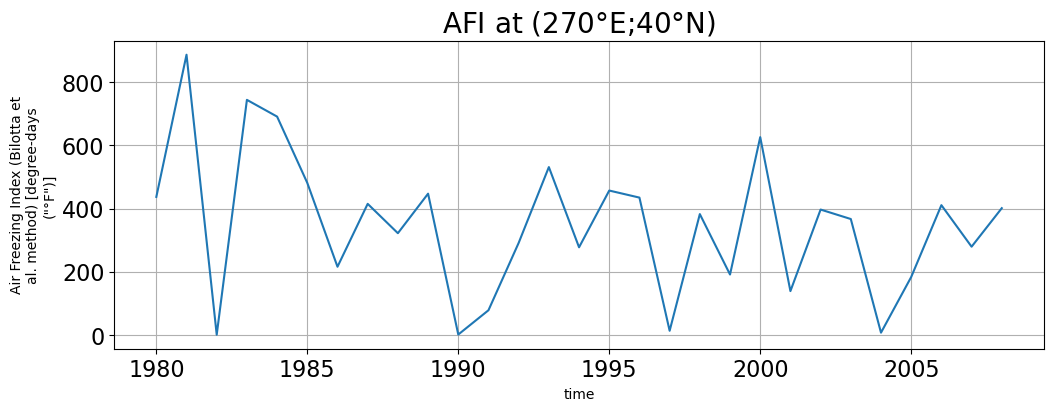

In [68]:
fig, axs =plt.subplots(nrows=1,ncols=1,figsize=(12,4))
afi.plot(ax=axs)
axs.grid()
axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fontsize=16)
axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)

# With GEV vs Gumbl vs Weibull

# Retun level Plot
A return level plot of the annual AFI in degree-days (F) versus the return period in years. The smaller the return period, the more data points we have, as these events are more likely. In contrast, events of a 10-year to a 100-year return period are rare in our 103-year-long dataset.

/tmp/ipykernel_3590456/485773876.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/485773876.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


Text(0.5, 1.0, '')

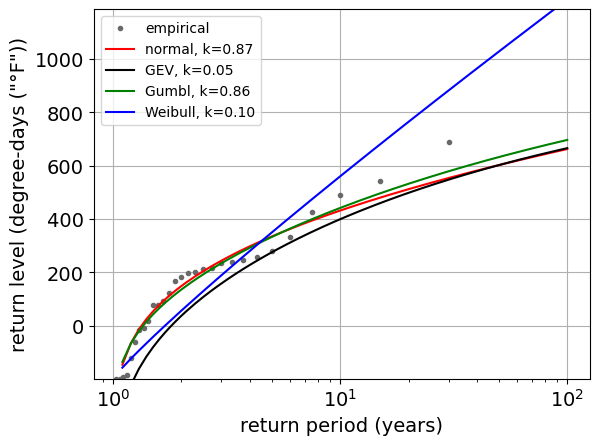

In [69]:
# Extract AFI values
afi_values = afi.values
# Remove zeros if any (as in Bilotta et al.)
nonzero_afis = afi_values[afi_values > 0]


# setup plots
fig, ax = plt.subplots()
# get empirical return levels and plot them
_ = empirical_return_level(nonzero_afis).plot(ax=ax, marker=".", color='dimgray',linestyle="None",label="empirical")
# create vector of years
years = np.arange(1.1, 100, 0.1)
# calculate and plot the normal return levels
pv_n=stats.kstest(nonzero_afis,stats.norm.cdf, args=(nonzero_afis.mean(),nonzero_afis.std()),N=ksN)[1]
ax.plot(years,stats.norm.ppf(1 - 1 / years, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),c='r',label=f"normal, k={pv_n:0.2f}")
# calculate and plot the GEV distribution, note the negtive shape parameter
shape, loc, scale = gev.fit(nonzero_afis)
pv_g= stats.kstest(nonzero_afis, 'genextreme', args=(shape, loc, scale),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shape, loc=loc, scale=scale),c='k',label=f"GEV, k={pv_g:0.2f}")

# calculate and plot the Gumbl distribution
shapeg, locg, scaleg = gev.fit(nonzero_afis,0)
pv_u = stats.kstest(nonzero_afis, 'genextreme', args=(shapeg, locg, scaleg),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shapeg, loc=locg, scale=scaleg),c='g',label=f"Gumbl, k={pv_u:0.2f}")

# Weibul distribution
params = stats.weibull_min.fit(nonzero_afis, floc=0) # floc=0 fixes the location parameter at 0
c_est, loc_est, scale_est = params
pv_w = stats.kstest(nonzero_afis, stats.weibull_min.name, params,N=ksN)[1]
ax.plot(years, stats.weibull_min(c_est, loc_est, scale_est).ppf(1 - 1 / years),c='b',label=f"Weibull, k={pv_w:0.2f}")

# set x axis to log scale
ax.set_xscale("log")
ax.set_ylabel(f'return level ({units})',fontsize=14)
ax.set_xlabel('return period (years)',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
ax.grid()
# set y axis lim
ax.set_ylim(nonzero_afis.min(),nonzero_afis.max()+500.)
# show legend
ax.legend()
ax.set_title('')

# Histogram and distributions Plot:
Histogram plot of the annual AFI in degree-days (F) with normal, GEV, Gumbl, Weibull distributions overlaid in red, black, green and blue. 

/tmp/ipykernel_3590456/1859071449.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/1859071449.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


[Text(0, 0.0, '0.0000'),
 Text(0, 0.0005, '0.0005'),
 Text(0, 0.001, '0.0010'),
 Text(0, 0.0015, '0.0015'),
 Text(0, 0.002, '0.0020'),
 Text(0, 0.0025, '0.0025'),
 Text(0, 0.003, '0.0030')]

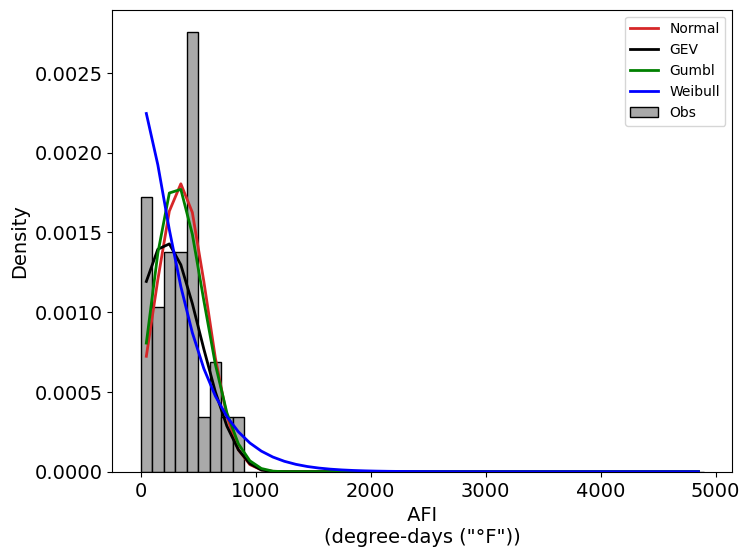

In [70]:
#####
##### PDF Plot
#####

bins = np.arange(0,5000,100)
x100 = (bins[1:]+bins[:-1])*0.5
# create vector of years
years = np.arange(1.1, 100, 0.1)

fig, ax= plt.subplots(nrows=1,ncols=1,figsize=(8,6))
dh=histogram(afi.where(afi>0), bins=bins,density=True, block_size=None)
ax.bar((bins[1:]+bins[:-1])*0.5,dh.data,edgecolor='k',color='darkgrey',\
          width=np.diff(bins), label='Obs')

# normal distribution
ax.plot(x100,stats.norm.pdf(x100, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),
    c="C3",lw=2,label="Normal")
# GEV distribution
ax.plot(x100, gev.pdf(x100, shape, loc=loc, scale=scale), c="k", lw=2, label="GEV")
# Gumbl distribution
ax.plot(x100, gev.pdf(x100, shapeg, loc=locg, scale=scaleg), c="g", lw=2, label="Gumbl")

# Weibul distribution
ax.plot(x100, stats.weibull_min(c_est, loc_est, scale_est).pdf(x100), c="b", lw=2, label="Weibull")

# calculate and plot the Gumbl distribution
shape, loc, scale = gev.fit(nonzero_afis,0)
ax.legend()
ax.set_xlabel(f" AFI \n({units})",fontsize=14)
ax.set_ylabel("Density",fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)

# Histogram plot of the annual AFI in degree-days (F) with normal, GEV, Gumbl, Weibull distributions overlaid in red, black, green and blue. 

# Pt 3

In [71]:
ij=2
ilon=ptlon[ij]
ilat=ptlat[ij]
afi=ds['AFI'].sel(lon=ilon,lat=ilat).load()
result,method = utils.calculate_bilotta_afi_return_periods(afi,return_periods=return_periods, method='gev')

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
/tmp/ipykernel_3590456/2325202151.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fonts

Text(0.5, 1.0, 'AFI at (264.25$\\degree$E;37$\\degree$N)')

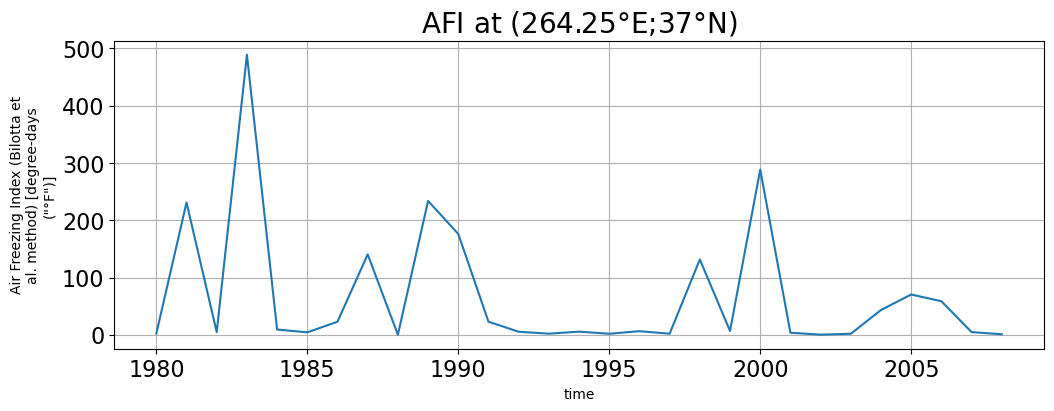

In [72]:
fig, axs =plt.subplots(nrows=1,ncols=1,figsize=(12,4))
afi.plot(ax=axs)
axs.grid()
axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fontsize=16)
axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)

# With GEV vs Gumbl vs Weibull

# Retun level Plot
A return level plot of the annual AFI in degree-days (F) versus the return period in years. The smaller the return period, the more data points we have, as these events are more likely. In contrast, events of a 10-year to a 100-year return period are rare in our 103-year-long dataset.

/tmp/ipykernel_3590456/1069143286.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/1069143286.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


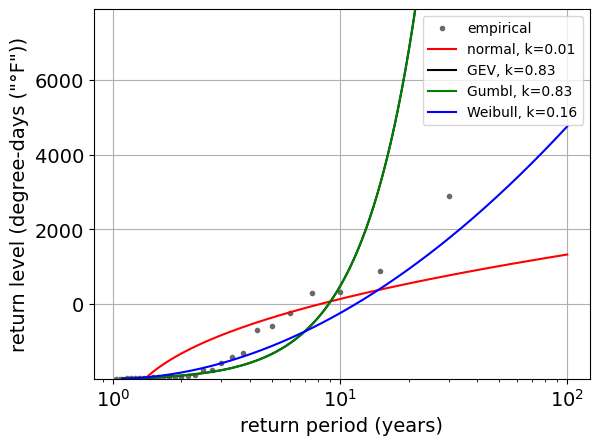

In [73]:
# Extract AFI values
afi_values = afi.values
# Remove zeros if any (as in Bilotta et al.)
nonzero_afis = afi_values[afi_values > 0]


# setup plots
fig, ax = plt.subplots()
# get empirical return levels and plot them
_ = empirical_return_level(nonzero_afis).plot(ax=ax, marker=".", color='dimgray',linestyle="None",label="empirical")
# create vector of years
years = np.arange(1.1, 100, 0.1)
# calculate and plot the normal return levels
pv_n=stats.kstest(nonzero_afis,stats.norm.cdf, args=(nonzero_afis.mean(),nonzero_afis.std()),N=ksN)[1]
ax.plot(years,stats.norm.ppf(1 - 1 / years, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),c='r',label=f"normal, k={pv_n:0.2f}")
# calculate and plot the GEV distribution, note the negtive shape parameter
shape, loc, scale = gev.fit(nonzero_afis)
pv_g= stats.kstest(nonzero_afis, 'genextreme', args=(shape, loc, scale),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shape, loc=loc, scale=scale),c='k',label=f"GEV, k={pv_g:0.2f}")

# calculate and plot the Gumbl distribution
shapeg, locg, scaleg = gev.fit(nonzero_afis,0)
pv_u = stats.kstest(nonzero_afis, 'genextreme', args=(shapeg, locg, scaleg),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shapeg, loc=locg, scale=scaleg),c='g',label=f"Gumbl, k={pv_u:0.2f}")

# Weibul distribution
params = stats.weibull_min.fit(nonzero_afis, floc=0) # floc=0 fixes the location parameter at 0
c_est, loc_est, scale_est = params
pv_w = stats.kstest(nonzero_afis, stats.weibull_min.name, params,N=ksN)[1]
ax.plot(years, stats.weibull_min(c_est, loc_est, scale_est).ppf(1 - 1 / years),c='b',label=f"Weibull, k={pv_w:0.2f}")

# set x axis to log scale
ax.set_xscale("log")
ax.set_ylabel(f'return level ({units})',fontsize=14)
ax.set_xlabel('return period (years)',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
ax.grid()
# set y axis lim
ax.set_ylim(nonzero_afis.min(),nonzero_afis.max()+500.)
# show legend
ax.legend()

# Histogram and distributions Plot:
Histogram plot of the annual AFI in degree-days (F) with normal, GEV, Gumbl, Weibull distributions overlaid in red, black, green and blue. 

/tmp/ipykernel_3590456/2049642222.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/2049642222.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


[Text(0, 0.0, '0.000'),
 Text(0, 0.001, '0.001'),
 Text(0, 0.002, '0.002'),
 Text(0, 0.003, '0.003'),
 Text(0, 0.004, '0.004'),
 Text(0, 0.005, '0.005'),
 Text(0, 0.006, '0.006'),
 Text(0, 0.007, '0.007'),
 Text(0, 0.008, '0.008')]

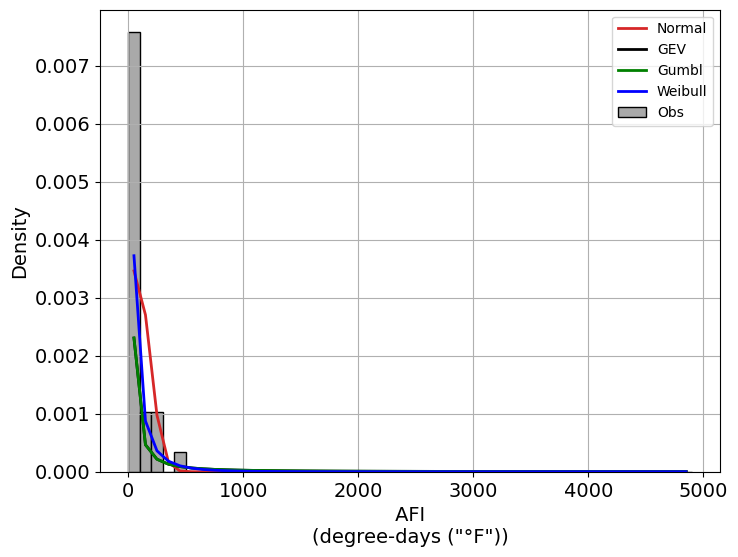

In [74]:
#####
##### PDF Plot
#####

bins = np.arange(0,5000,100)
x100 = (bins[1:]+bins[:-1])*0.5
# create vector of years
years = np.arange(1.1, 100, 0.1)

fig, ax= plt.subplots(nrows=1,ncols=1,figsize=(8,6))
dh=histogram(afi.where(afi>0), bins=bins,density=True, block_size=None)
ax.bar((bins[1:]+bins[:-1])*0.5,dh.data,edgecolor='k',color='darkgrey',\
          width=np.diff(bins), label='Obs')

# normal distribution
ax.plot(x100,stats.norm.pdf(x100, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),
    c="C3",lw=2,label="Normal")
# GEV distribution
ax.plot(x100, gev.pdf(x100, shape, loc=loc, scale=scale), c="k", lw=2, label="GEV")
# Gumbl distribution
ax.plot(x100, gev.pdf(x100, shapeg, loc=locg, scale=scaleg), c="g", lw=2, label="Gumbl")

# Weibul distribution
ax.plot(x100, stats.weibull_min(c_est, loc_est, scale_est).pdf(x100), c="b", lw=2, label="Weibull")

# calculate and plot the Gumbl distribution
shape, loc, scale = gev.fit(nonzero_afis,0)

# set y axis lim

ax.legend()
ax.grid()
ax.set_xlabel(f" AFI \n({units})",fontsize=14)
ax.set_ylabel("Density",fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)

# Pt 4

In [75]:
ij=3
ilon=ptlon[ij]
ilat=ptlat[ij]
afi=ds['AFI'].sel(lon=ilon,lat=ilat).load()
result,method = utils.calculate_bilotta_afi_return_periods(afi,return_periods=return_periods, method='gev')

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
/tmp/ipykernel_3590456/2325202151.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fonts

Text(0.5, 1.0, 'AFI at (241$\\degree$E;46.25$\\degree$N)')

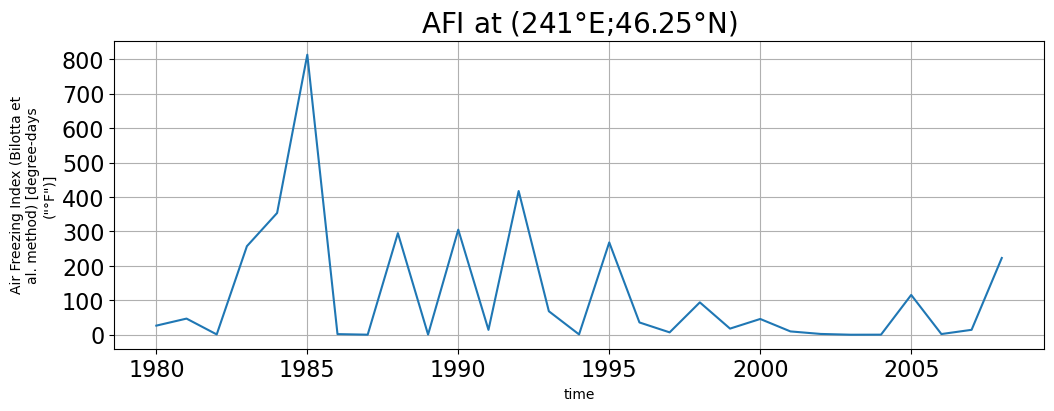

In [76]:
fig, axs =plt.subplots(nrows=1,ncols=1,figsize=(12,4))
afi.plot(ax=axs)
axs.grid()
axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fontsize=16)
axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)

# With GEV vs Gumbl vs Weibull

# Retun level Plot
A return level plot of the annual AFI in degree-days (F) versus the return period in years. The smaller the return period, the more data points we have, as these events are more likely. In contrast, events of a 10-year to a 100-year return period are rare in our 103-year-long dataset.

/tmp/ipykernel_3590456/1069143286.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/1069143286.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


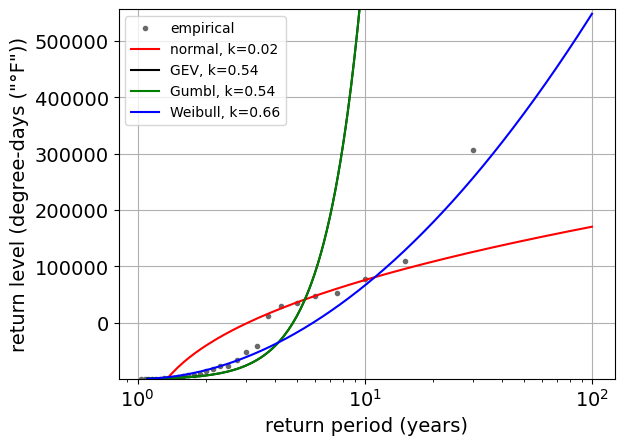

In [77]:
# Extract AFI values
afi_values = afi.values
# Remove zeros if any (as in Bilotta et al.)
nonzero_afis = afi_values[afi_values > 0]


# setup plots
fig, ax = plt.subplots()
# get empirical return levels and plot them
_ = empirical_return_level(nonzero_afis).plot(ax=ax, marker=".", color='dimgray',linestyle="None",label="empirical")
# create vector of years
years = np.arange(1.1, 100, 0.1)
# calculate and plot the normal return levels
pv_n=stats.kstest(nonzero_afis,stats.norm.cdf, args=(nonzero_afis.mean(),nonzero_afis.std()),N=ksN)[1]
ax.plot(years,stats.norm.ppf(1 - 1 / years, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),c='r',label=f"normal, k={pv_n:0.2f}")
# calculate and plot the GEV distribution, note the negtive shape parameter
shape, loc, scale = gev.fit(nonzero_afis)
pv_g= stats.kstest(nonzero_afis, 'genextreme', args=(shape, loc, scale),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shape, loc=loc, scale=scale),c='k',label=f"GEV, k={pv_g:0.2f}")

# calculate and plot the Gumbl distribution
shapeg, locg, scaleg = gev.fit(nonzero_afis,0)
pv_u = stats.kstest(nonzero_afis, 'genextreme', args=(shapeg, locg, scaleg),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shapeg, loc=locg, scale=scaleg),c='g',label=f"Gumbl, k={pv_u:0.2f}")

# Weibul distribution
params = stats.weibull_min.fit(nonzero_afis, floc=0) # floc=0 fixes the location parameter at 0
c_est, loc_est, scale_est = params
pv_w = stats.kstest(nonzero_afis, stats.weibull_min.name, params,N=ksN)[1]
ax.plot(years, stats.weibull_min(c_est, loc_est, scale_est).ppf(1 - 1 / years),c='b',label=f"Weibull, k={pv_w:0.2f}")

# set x axis to log scale
ax.set_xscale("log")
ax.set_ylabel(f'return level ({units})',fontsize=14)
ax.set_xlabel('return period (years)',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
ax.grid()
# set y axis lim
ax.set_ylim(nonzero_afis.min(),nonzero_afis.max()+500.)
# show legend
ax.legend()

# Histogram and distributions Plot:
Histogram plot of the annual AFI in degree-days (F) with normal, GEV, Gumbl, Weibull distributions overlaid in red, black, green and blue. 

/tmp/ipykernel_3590456/184545026.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/184545026.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


[Text(0, 0.0, '0.000'),
 Text(0, 0.001, '0.001'),
 Text(0, 0.002, '0.002'),
 Text(0, 0.003, '0.003'),
 Text(0, 0.004, '0.004'),
 Text(0, 0.005, '0.005'),
 Text(0, 0.006, '0.006'),
 Text(0, 0.007, '0.007'),
 Text(0, 0.008, '0.008')]

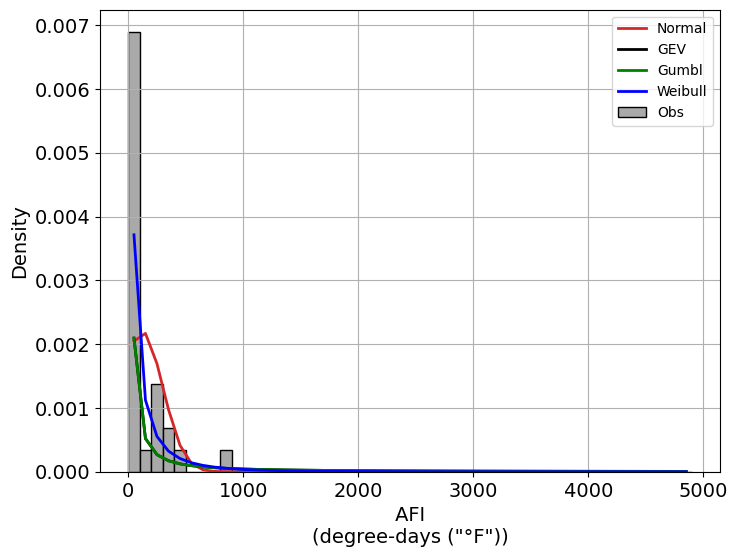

In [78]:
#####
##### PDF Plot
#####

bins = np.arange(0,5000,100)
x100 = (bins[1:]+bins[:-1])*0.5
# create vector of years
years = np.arange(1.1, 100, 0.1)

fig, ax= plt.subplots(nrows=1,ncols=1,figsize=(8,6))
dh=histogram(afi.where(afi>0), bins=bins,density=True, block_size=None)
ax.bar((bins[1:]+bins[:-1])*0.5,dh.data,edgecolor='k',color='darkgrey',\
          width=np.diff(bins), label='Obs')

# normal distribution
ax.plot(x100,stats.norm.pdf(x100, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),
    c="C3",lw=2,label="Normal")
# GEV distribution
ax.plot(x100, gev.pdf(x100, shape, loc=loc, scale=scale), c="k", lw=2, label="GEV")
# Gumbl distribution
ax.plot(x100, gev.pdf(x100, shapeg, loc=locg, scale=scaleg), c="g", lw=2, label="Gumbl")

# Weibul distribution
ax.plot(x100, stats.weibull_min(c_est, loc_est, scale_est).pdf(x100), c="b", lw=2, label="Weibull")

# calculate and plot the Gumbl distribution
shape, loc, scale = gev.fit(nonzero_afis,0)
ax.legend()
ax.grid()
ax.set_xlabel(f" AFI \n({units})",fontsize=14)
ax.set_ylabel("Density",fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)

# pt 5

In [79]:
ij=4
ilon=ptlon[ij]
ilat=ptlat[ij]
afi=ds['AFI'].sel(lon=ilon,lat=ilat).load()

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
/tmp/ipykernel_3590456/2325202151.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fonts

Text(0.5, 1.0, 'AFI at (205$\\degree$E;68.75$\\degree$N)')

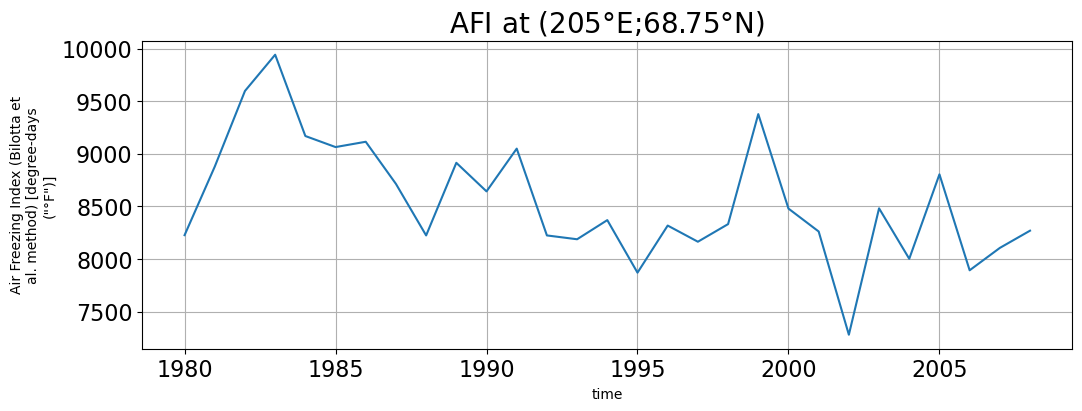

In [80]:
fig, axs =plt.subplots(nrows=1,ncols=1,figsize=(12,4))
afi.plot(ax=axs)
axs.grid()
axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fontsize=16)
axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)

# Retun level Plot
A return level plot of the annual AFI in degree-days (F) versus the return period in years. The smaller the return period, the more data points we have, as these events are more likely. In contrast, events of a 10-year to a 100-year return period are rare in our 103-year-long dataset.

/tmp/ipykernel_3590456/1069143286.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/1069143286.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


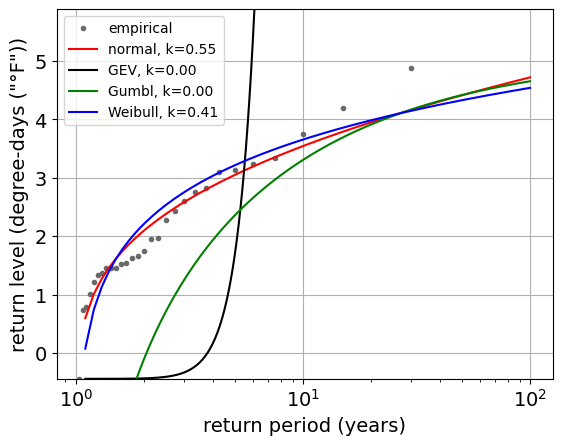

In [81]:
# Extract AFI values
afi_values = afi.values
# Remove zeros if any (as in Bilotta et al.)
nonzero_afis = afi_values[afi_values > 0]


# setup plots
fig, ax = plt.subplots()
# get empirical return levels and plot them
_ = empirical_return_level(nonzero_afis).plot(ax=ax, marker=".", color='dimgray',linestyle="None",label="empirical")
# create vector of years
years = np.arange(1.1, 100, 0.1)
# calculate and plot the normal return levels
pv_n=stats.kstest(nonzero_afis,stats.norm.cdf, args=(nonzero_afis.mean(),nonzero_afis.std()),N=ksN)[1]
ax.plot(years,stats.norm.ppf(1 - 1 / years, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),c='r',label=f"normal, k={pv_n:0.2f}")
# calculate and plot the GEV distribution, note the negtive shape parameter
shape, loc, scale = gev.fit(nonzero_afis)
pv_g= stats.kstest(nonzero_afis, 'genextreme', args=(shape, loc, scale),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shape, loc=loc, scale=scale),c='k',label=f"GEV, k={pv_g:0.2f}")

# calculate and plot the Gumbl distribution
shapeg, locg, scaleg = gev.fit(nonzero_afis,0)
pv_u = stats.kstest(nonzero_afis, 'genextreme', args=(shapeg, locg, scaleg),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shapeg, loc=locg, scale=scaleg),c='g',label=f"Gumbl, k={pv_u:0.2f}")

# Weibul distribution
params = stats.weibull_min.fit(nonzero_afis, floc=0) # floc=0 fixes the location parameter at 0
c_est, loc_est, scale_est = params
pv_w = stats.kstest(nonzero_afis, stats.weibull_min.name, params,N=ksN)[1]
ax.plot(years, stats.weibull_min(c_est, loc_est, scale_est).ppf(1 - 1 / years),c='b',label=f"Weibull, k={pv_w:0.2f}")

# set x axis to log scale
ax.set_xscale("log")
ax.set_ylabel(f'return level ({units})',fontsize=14)
ax.set_xlabel('return period (years)',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
ax.grid()
# set y axis lim
ax.set_ylim(nonzero_afis.min(),nonzero_afis.max()+500.)
# show legend
ax.legend()

# Histogram and distributions Plot:
Histogram plot of the annual AFI in degree-days (F) with normal, GEV, Gumbl, Weibull distributions overlaid in red, black, green and blue. 

/tmp/ipykernel_3590456/4134725402.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/4134725402.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


[Text(0, 0.0, '0.00000'),
 Text(0, 0.00025, '0.00025'),
 Text(0, 0.0005, '0.00050'),
 Text(0, 0.00075, '0.00075'),
 Text(0, 0.001, '0.00100'),
 Text(0, 0.00125, '0.00125'),
 Text(0, 0.0015, '0.00150'),
 Text(0, 0.00175, '0.00175'),
 Text(0, 0.002, '0.00200')]

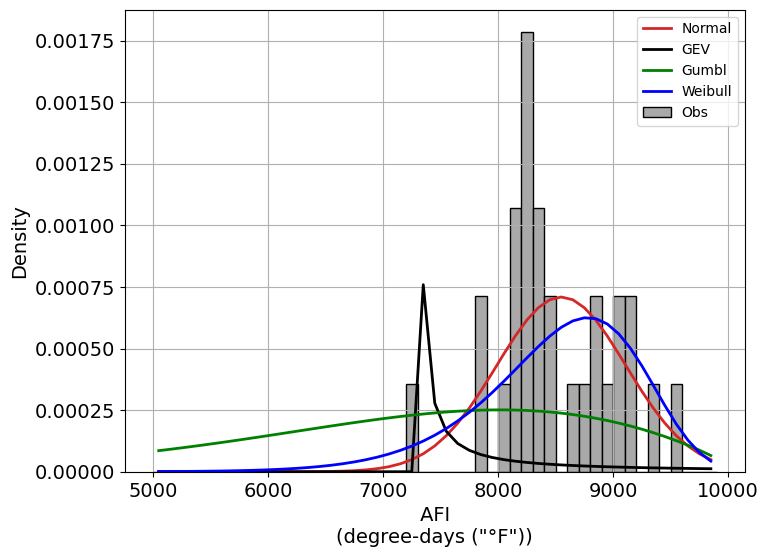

In [82]:
#####
##### PDF Plot
#####

bins = np.arange(5000,10000,100)
x100 = (bins[1:]+bins[:-1])*0.5
# create vector of years
years = np.arange(1.1, 100, 0.1)

fig, ax= plt.subplots(nrows=1,ncols=1,figsize=(8,6))
dh=histogram(afi.where(afi>0), bins=bins,density=True, block_size=None)
ax.bar((bins[1:]+bins[:-1])*0.5,dh.data,edgecolor='k',color='darkgrey',\
          width=np.diff(bins), label='Obs')

# normal distribution
ax.plot(x100,stats.norm.pdf(x100, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),
    c="C3",lw=2,label="Normal")
# GEV distribution
ax.plot(x100, gev.pdf(x100, shape, loc=loc, scale=scale), c="k", lw=2, label="GEV")
# Gumbl distribution
ax.plot(x100, gev.pdf(x100, shapeg, loc=locg, scale=scaleg), c="g", lw=2, label="Gumbl")

# Weibul distribution
ax.plot(x100, stats.weibull_min(c_est, loc_est, scale_est).pdf(x100), c="b", lw=2, label="Weibull")

# calculate and plot the Gumbl distribution
shape, loc, scale = gev.fit(nonzero_afis,0)
ax.legend()
# set y axis lim
ax.grid()
ax.set_xlabel(f" AFI \n({units})",fontsize=14)
ax.set_ylabel("Density",fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)

# Pt 6

In [83]:
ij=5
ilon=ptlon[ij]
ilat=ptlat[ij]
afi=ds['AFI'].sel(lon=ilon,lat=ilat).load()

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:6: SyntaxWarning: invalid escape sequence '\d'
  axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)
/tmp/ipykernel_3590456/2325202151.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
/tmp/ipykernel_3590456/2325202151.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fonts

Text(0.5, 1.0, 'AFI at (204$\\degree$E;60$\\degree$N)')

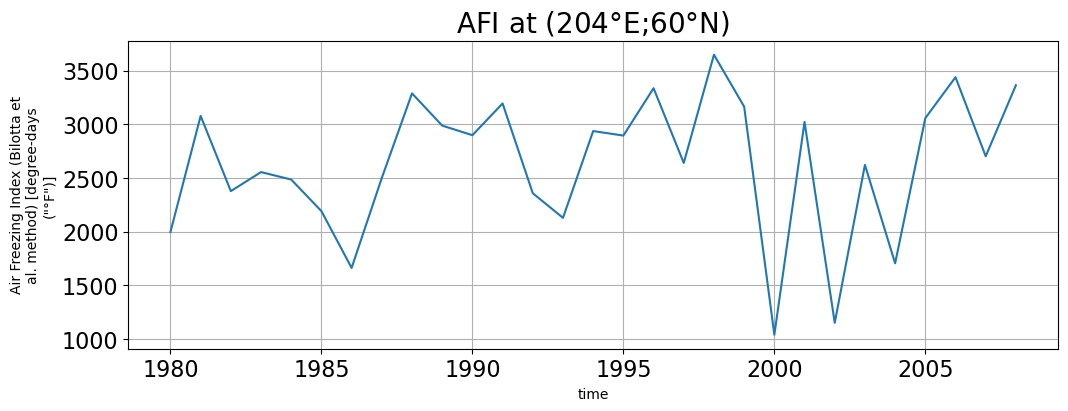

In [84]:
fig, axs =plt.subplots(nrows=1,ncols=1,figsize=(12,4))
afi.plot(ax=axs)
axs.grid()
axs.set_xticklabels([round(ix) for ix in axs.get_xticks()[:]],fontsize=16)
axs.set_yticklabels([round(ix) for ix in axs.get_yticks()[:]],fontsize=16)
axs.set_title(f'AFI at ({ilon}$\degree$E;{ilat}$\degree$N)',fontsize=20)

# Retun level Plot
A return level plot of the annual AFI in degree-days (F) versus the return period in years. The smaller the return period, the more data points we have, as these events are more likely. In contrast, events of a 10-year to a 100-year return period are rare in our 103-year-long dataset.

/tmp/ipykernel_3590456/1069143286.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/1069143286.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


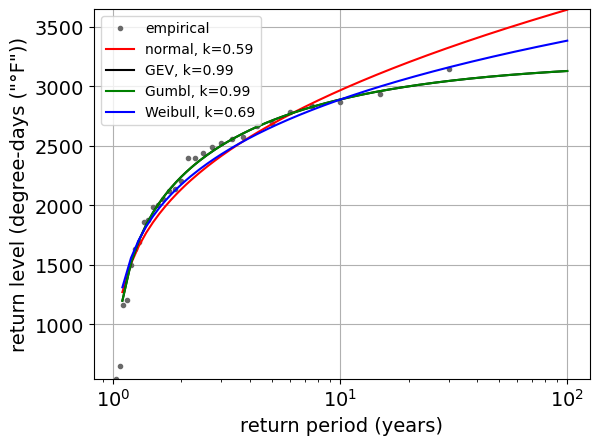

In [85]:
# Extract AFI values
afi_values = afi.values
# Remove zeros if any (as in Bilotta et al.)
nonzero_afis = afi_values[afi_values > 0]


# setup plots
fig, ax = plt.subplots()
# get empirical return levels and plot them
_ = empirical_return_level(nonzero_afis).plot(ax=ax, marker=".", color='dimgray',linestyle="None",label="empirical")
# create vector of years
years = np.arange(1.1, 100, 0.1)
# calculate and plot the normal return levels
pv_n=stats.kstest(nonzero_afis,stats.norm.cdf, args=(nonzero_afis.mean(),nonzero_afis.std()),N=ksN)[1]
ax.plot(years,stats.norm.ppf(1 - 1 / years, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),c='r',label=f"normal, k={pv_n:0.2f}")
# calculate and plot the GEV distribution, note the negtive shape parameter
shape, loc, scale = gev.fit(nonzero_afis)
pv_g= stats.kstest(nonzero_afis, 'genextreme', args=(shape, loc, scale),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shape, loc=loc, scale=scale),c='k',label=f"GEV, k={pv_g:0.2f}")

# calculate and plot the Gumbl distribution
shapeg, locg, scaleg = gev.fit(nonzero_afis,0)
pv_u = stats.kstest(nonzero_afis, 'genextreme', args=(shapeg, locg, scaleg),N=ksN)[1]
ax.plot(years, gev.ppf(1 - 1 / years, shapeg, loc=locg, scale=scaleg),c='g',label=f"Gumbl, k={pv_u:0.2f}")

# Weibul distribution
params = stats.weibull_min.fit(nonzero_afis, floc=0) # floc=0 fixes the location parameter at 0
c_est, loc_est, scale_est = params
pv_w = stats.kstest(nonzero_afis, stats.weibull_min.name, params,N=ksN)[1]
ax.plot(years, stats.weibull_min(c_est, loc_est, scale_est).ppf(1 - 1 / years),c='b',label=f"Weibull, k={pv_w:0.2f}")

# set x axis to log scale
ax.set_xscale("log")
ax.set_ylabel(f'return level ({units})',fontsize=14)
ax.set_xlabel('return period (years)',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
ax.grid()
# set y axis lim
ax.set_ylim(nonzero_afis.min(),nonzero_afis.max()+500.)
# show legend
ax.legend()

# Histogram and distributions Plot:
Histogram plot of the annual AFI in degree-days (F) with normal, GEV, Gumbl, Weibull distributions overlaid in red, black, green and blue. 

/tmp/ipykernel_3590456/3923592984.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
/tmp/ipykernel_3590456/3923592984.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)


[Text(0, 0.0, '0.0000'),
 Text(0, 0.0002, '0.0002'),
 Text(0, 0.0004, '0.0004'),
 Text(0, 0.0006000000000000001, '0.0006'),
 Text(0, 0.0008, '0.0008'),
 Text(0, 0.001, '0.0010'),
 Text(0, 0.0012000000000000001, '0.0012')]

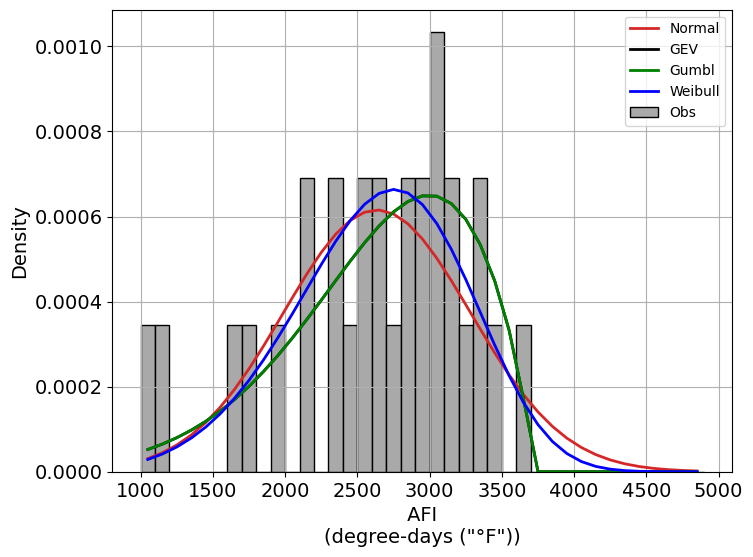

In [86]:
#####
##### PDF Plot
#####

bins = np.arange(1000,5000,100)
x100 = (bins[1:]+bins[:-1])*0.5
# create vector of years
years = np.arange(1.1, 100, 0.1)

fig, ax= plt.subplots(nrows=1,ncols=1,figsize=(8,6))
dh=histogram(afi.where(afi>0), bins=bins,density=True, block_size=None)
ax.bar((bins[1:]+bins[:-1])*0.5,dh.data,edgecolor='k',color='darkgrey',\
          width=np.diff(bins), label='Obs')

# normal distribution
ax.plot(x100,stats.norm.pdf(x100, loc=nonzero_afis.mean(), scale=nonzero_afis.std()),
    c="C3",lw=2,label="Normal")
# GEV distribution
ax.plot(x100, gev.pdf(x100, shape, loc=loc, scale=scale), c="k", lw=2, label="GEV")
# Gumbl distribution
ax.plot(x100, gev.pdf(x100, shapeg, loc=locg, scale=scaleg), c="g", lw=2, label="Gumbl")

# Weibul distribution
ax.plot(x100, stats.weibull_min(c_est, loc_est, scale_est).pdf(x100), c="b", lw=2, label="Weibull")

# calculate and plot the Gumbl distribution
shape, loc, scale = gev.fit(nonzero_afis,0)
ax.legend()
ax.grid()
ax.set_xlabel(f" AFI \n({units})",fontsize=14)
ax.set_ylabel("Density",fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)